Дан массив данных
([[5,3], [10,15], [15,12], [24,10], [30,45], [85,70], [71,80], [60,78], [55,52], [80,91],])
Требуется провести кластерный анализ данных методом k-средних.
Поэкспериментируйте с количеством кластеров.

In [14]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [15]:
X = np.array([[5, 3],
              [10, 15],
              [15, 12],
              [24, 10],
              [30, 45],
              [85, 70],
              [71, 80],
              [60, 78],
              [55, 52],
              [80, 91], ])

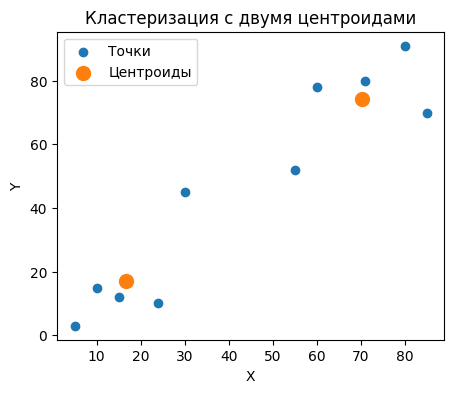

In [28]:
x_2_clusters = KMeans(n_clusters=2, n_init=10, random_state=0)
x_2_clusters.fit(X)

plt.figure(figsize=(5, 4))
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Кластеризация с двумя центроидами")
plt.scatter(X[:, 0], X[:, 1], label="Точки")
plt.scatter(x_2_clusters.cluster_centers_[:, 0], x_2_clusters.cluster_centers_[:, 1],
            marker='o', s=100, label="Центроиды")
plt.legend()
plt.show()

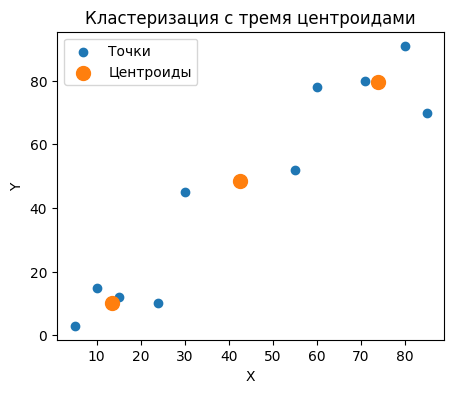

In [17]:
x_3_clusters = KMeans(n_clusters=3, n_init=10, random_state=0)
x_3_clusters.fit(X)

plt.figure(figsize=(5, 4))
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Кластеризация с тремя центроидами")
plt.scatter(X[:, 0], X[:, 1], label="Точки")
plt.scatter(x_3_clusters.cluster_centers_[:, 0], x_3_clusters.cluster_centers_[:, 1],
            marker='o', s=100, label="Центроиды")
plt.legend()
plt.show()

Выполните кластеризацию для набора данных ирисов Фишера. Выполните
предсказания для модели. Поэкспериментируйте с количеством кластеров.

In [18]:
data = sns.load_dataset('iris').drop(["species", "sepal_length", "sepal_width"], axis=1)
data.head(5)

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [19]:
iris_clusters_2 = KMeans(n_clusters=2)
data['clusters_2'] = iris_clusters_2.fit_predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [20]:
iris_clusters_3 = KMeans(n_clusters=3)
data['clusters_3'] = iris_clusters_3.fit_predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


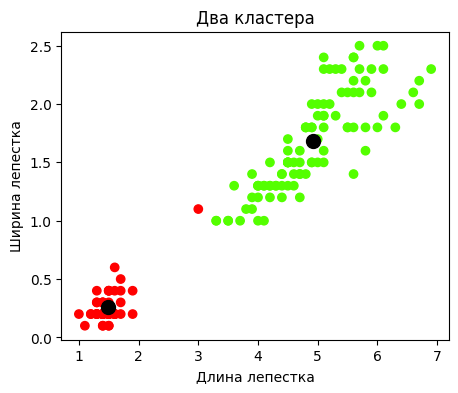

In [21]:
plt.figure(figsize=(5, 4))
plt.xlabel('Длина лепестка')
plt.ylabel('Ширина лепестка')
plt.title("Два кластера")
plt.scatter(data.petal_length, data.petal_width, c=data.clusters_2, cmap='prism')
plt.scatter(iris_clusters_2.cluster_centers_[:, 0], iris_clusters_2.cluster_centers_[:, 1], c='k', s=100)
plt.show()

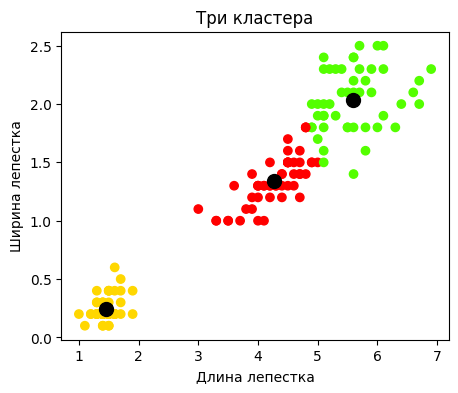

In [22]:
plt.figure(figsize=(5, 4))
plt.xlabel('Длина лепестка')
plt.ylabel('Ширина лепестка')
plt.title("Три кластера")
plt.scatter(data.petal_length, data.petal_width, c=data.clusters_3, cmap='prism')
plt.scatter(iris_clusters_3.cluster_centers_[:, 0], iris_clusters_3.cluster_centers_[:, 1], c='k', s=100)
plt.show()

Задание. Выполните иерархическую кластеризацию для набора данных об
ирисах Фишера. При этом необходимо использовать любые два признака
(всего их четыре).

In [23]:
data = sns.load_dataset("iris").drop(["petal_width", "petal_length", "species"], axis=1)
data.head(5)

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


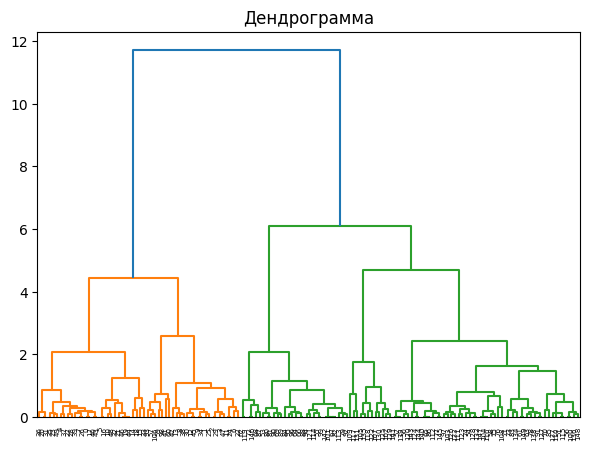

In [24]:
plt.figure(figsize=(7, 5))
plt.title("Дендрограмма")
dend = dendrogram(linkage(data, method="ward"))

In [25]:
model = AgglomerativeClustering(n_clusters=4, linkage="ward")
data["cluster"] = model.fit_predict(data)

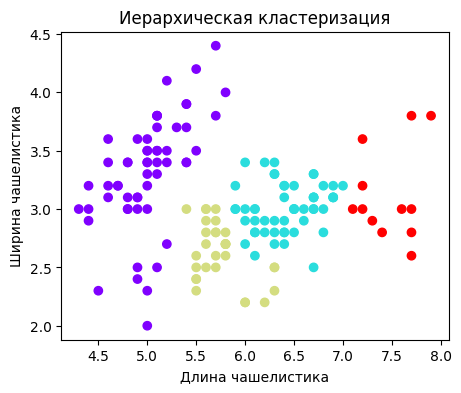

In [26]:
plt.figure(figsize=(5, 4))
plt.title("Иерархическая кластеризация")
plt.xlabel("Длина чашелистика")
plt.ylabel("Ширина чашелистика")
plt.scatter(data.sepal_length, data.sepal_width, c=data.cluster, cmap="rainbow")
plt.show()